**Phase 1: Data Preparation **

In [1]:
import pandas as pd

# Replace with your file path in Google Colab or upload manually
file_path =r"C:\\Users\\Mukesh\\Desktop\\SEM 7 PROJECT PROPOSALS\\new_retail_data.csv"

df = pd.read_csv(file_path)
print("Shape:", df.shape)
df.head()


Shape: (302010, 30)


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [2]:
# Remove duplicates
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)



Duplicates: 4


In [3]:
# Check if any Transaction_IDs are duplicated
print("Duplicate Transaction_IDs:", df['Transaction_ID'].duplicated().sum())

# Check if any Emails are duplicated
print("Duplicate Emails:", df['Email'].duplicated().sum())

# Optional: Check if any Phone numbers are duplicated
print("Duplicate Phone Numbers:", df['Phone'].duplicated().sum())


Duplicate Transaction_IDs: 7544
Duplicate Emails: 249108
Duplicate Phone Numbers: 2710


In [4]:
# Remove duplicate transactions
df = df.drop_duplicates(subset='Transaction_ID', keep='first')

print(" Cleaned: Duplicate Transaction_IDs removed.")
print("New shape:", df.shape)


 Cleaned: Duplicate Transaction_IDs removed.
New shape: (294462, 30)


You removed any repeated transactions, based on Transaction_ID (which should be unique).

If the same Transaction_ID appears more than once, only the first occurrence is kept, rest are deleted.



In [5]:
# Check for nulls
nulls = df.isnull().sum()
print("Null values:\n", nulls)


Null values:
 Transaction_ID        1
Customer_ID         296
Name                373
Email               336
Phone               350
Address             310
City                244
State               271
Zipcode             331
Country             266
Age                 169
Gender              310
Income              282
Customer_Segment    208
Date                351
Year                345
Month               265
Time                336
Total_Purchases     354
Amount              347
Total_Amount        343
Product_Category    275
Product_Brand       270
Product_Type          0
Feedback            180
Shipping_Method     330
Payment_Method      290
Order_Status        232
Ratings             180
products              0
dtype: int64


In [6]:
# Drop rows missing critical info (Transaction ID, Customer ID)
df.dropna(subset=['Transaction_ID', 'Customer_ID', 'Amount', 'Total_Amount'], inplace=True)


Removed rows where any of these 4 critical columns were missing:

Transaction_ID

Customer_ID

Amount

Total_Amount

 These columns are essential to track transactions and calculate revenue. If they're missing, that row is not usable — so you dropped it.



In [7]:
# Check for nulls
nulls = df.isnull().sum()
print("Null values:\n", nulls)

Null values:
 Transaction_ID        0
Customer_ID           0
Name                370
Email               336
Phone               350
Address             308
City                244
State               269
Zipcode             330
Country             264
Age                 169
Gender              309
Income              282
Customer_Segment    208
Date                350
Year                345
Month               264
Time                335
Total_Purchases     354
Amount                0
Total_Amount          0
Product_Category    275
Product_Brand       269
Product_Type          0
Feedback            180
Shipping_Method     327
Payment_Method      290
Order_Status        232
Ratings             180
products              0
dtype: int64


In [8]:
# Ratings → Convert to numeric + fill with median
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')
df['Ratings'] = df['Ratings'].fillna(df['Ratings'].median())

# Feedback, Shipping, Payment, Order
df['Feedback'] = df['Feedback'].fillna('Unknown')
df['Shipping_Method'] = df['Shipping_Method'].fillna('Standard')  # or df.mode()
df['Payment_Method'] = df['Payment_Method'].fillna('Unknown')
df['Order_Status'] = df['Order_Status'].fillna('Unknown')


 Converted Ratings column to numeric (in case it had strings or wrong format).

 Filled missing values with the median rating, which avoids extreme values (outliers).

 You replaced missing text fields with default labels like "Unknown" or "Standard".

This keeps the data usable without deleting rows.



In [9]:
# Age → median; Gender & Income → mode; Customer_Segment → 'Regular'
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Income'] = df['Income'].fillna(df['Income'].mode()[0])
df['Customer_Segment'] = df['Customer_Segment'].fillna('Regular')


Handle Address & Location (Optional)
If you're using maps, geo charts or state-wise sales → fill
Else, you can leave or drop rows if only address is being analyzed.

In [10]:
df[['City', 'State', 'Zipcode', 'Country']] = df[['City', 'State', 'Zipcode', 'Country']].fillna('Unknown')
df[['Name', 'Email', 'Phone', 'Address']] = df[['Name', 'Email', 'Phone', 'Address']].fillna('N/A')


In [11]:
df['Product_Category'] = df['Product_Category'].fillna('Misc')
df['Product_Brand'] = df['Product_Brand'].fillna('Unknown')


In [12]:
df.dropna(subset=['Total_Purchases'], inplace=True)


In [13]:
#  Step 1: DO NOT remove null Dates yet — just clean everything
# (Assuming all earlier cleaning is already done above this cell)

#  First: Save full cleaned version BEFORE touching 'Date'
df_full = df.copy()  # Includes rows with or without valid Date/Time

#  Step 2: Now handle Date & Time parsing (safely, inplace)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=False)

#  Parse Time separately — and extract Hour from it
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour
#Converted string Date into real date format (datetime)

#Converted Time column and extracted hour (like 15 from 15:30:00)

#These help in time-based analysis like trends and peak shopping hours

#  Step 3: Time Slot assignment (based on Hour)
def get_time_slot(hour):
    if pd.isna(hour):
        return 'Unknown'
    if 5 <= hour < 12:
        return 'Morning (5AM-12PM)'
    elif 12 <= hour < 17:
        return 'Afternoon (12PM-5PM)'
    elif 17 <= hour < 21:
        return 'Evening (5PM-9PM)'
    else:
        return 'Night (9PM-5AM)'

df['Time_Slot'] = df['Hour'].apply(get_time_slot)

#  Step 4: Extract Year and Month — only if Date is valid
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

#This will helps to do year-wise and month-wise trend analysis.

#Very useful for line charts and time series dashboards.

#  Step 5: Create df_time with only valid rows (for EDA 12, trends etc.)
df_time = df.dropna(subset=['Date', 'Year', 'Month', 'Time'])

#  Final check
print(" df_full shape (all cleaned data):", df_full.shape)
print(" df_time shape (only date/time valid):", df_time.shape)


 df_full shape (all cleaned data): (293123, 30)
 df_time shape (only date/time valid): (177335, 32)


In [14]:
print(df_time['Date'].head())
print(type(df_time['Date'].iloc[0]))


0   2023-09-18
1   2023-12-31
2   2023-04-26
5   2023-09-21
6   2023-06-26
Name: Date, dtype: datetime64[ns]
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [15]:
print(" Remaining nulls:\n", df_full.isnull().sum())
print("Final dataset shape:", df_full.shape)

 Remaining nulls:
 Transaction_ID        0
Customer_ID           0
Name                  0
Email                 0
Phone                 0
Address               0
City                  0
State                 0
Zipcode               0
Country               0
Age                   0
Gender                0
Income                0
Customer_Segment      0
Date                350
Year                345
Month               260
Time                335
Total_Purchases       0
Amount                0
Total_Amount          0
Product_Category      0
Product_Brand         0
Product_Type          0
Feedback              0
Shipping_Method       0
Payment_Method        0
Order_Status          0
Ratings               0
products              0
dtype: int64
Final dataset shape: (293123, 30)


In [16]:
df_full = df_full.dropna(subset=['Name', 'Email', 'Phone', 'Address'])
print("✅ Remaining nulls:\n", df_full.isnull().sum())
print("Final cleaned dataset shape:", df_full.shape)

✅ Remaining nulls:
 Transaction_ID        0
Customer_ID           0
Name                  0
Email                 0
Phone                 0
Address               0
City                  0
State                 0
Zipcode               0
Country               0
Age                   0
Gender                0
Income                0
Customer_Segment      0
Date                350
Year                345
Month               260
Time                335
Total_Purchases       0
Amount                0
Total_Amount          0
Product_Category      0
Product_Brand         0
Product_Type          0
Feedback              0
Shipping_Method       0
Payment_Method        0
Order_Status          0
Ratings               0
products              0
dtype: int64
Final cleaned dataset shape: (293123, 30)


In [17]:
df_time = df_time.dropna(subset=['Name', 'Email', 'Phone', 'Address'])
print(" Remaining nulls:\n", df_time.isnull().sum())
print("Final cleaned dataset shape:", df_time.shape)


 Remaining nulls:
 Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
Hour                0
Time_Slot           0
dtype: int64
Final cleaned dataset shape: (177335, 32)


df_full ➤ for demographics, segments, products

df_time ➤ for anything involving date, month, time

In [18]:
df_full = df.copy()  # Save this cleaned, full dataset




In [19]:
print(df_full.shape)
print(df_time.shape)

(293123, 32)
(177335, 32)


In [20]:
#  Export cleaned full dataset (with all rows)
df_full.to_csv("df_full_cleaned.csv", index=False)

#  Export filtered time-based dataset (only rows with valid Date & Time)
df_time.to_csv("df_time_cleaned.csv", index=False)

print(" Both CSVs exported successfully!")
print(" df_full_cleaned.csv shape:", df_full.shape)
print(" df_time_cleaned.csv shape:", df_time.shape)


 Both CSVs exported successfully!
 df_full_cleaned.csv shape: (293123, 32)
 df_time_cleaned.csv shape: (177335, 32)


**PHASE 2 - EDA**

In [21]:
# 🔍 Preview data types (helps during schema design for SQL & Power BI)
print(df_time.dtypes)

# 📊 Check value distributions in key categorical columns
print("\nCustomer Segments:\n", df_full['Customer_Segment'].value_counts())
print("\nIncome Levels:\n", df_full['Income'].value_counts())
print("\nShipping Methods:\n", df_full['Shipping_Method'].value_counts())


Transaction_ID             float64
Customer_ID                float64
Name                        object
Email                       object
Phone                       object
Address                     object
City                        object
State                       object
Zipcode                     object
Country                     object
Age                        float64
Gender                      object
Income                      object
Customer_Segment            object
Date                datetime64[ns]
Year                       float64
Month                       object
Time                        object
Total_Purchases            float64
Amount                     float64
Total_Amount               float64
Product_Category            object
Product_Brand               object
Product_Type                object
Feedback                    object
Shipping_Method             object
Payment_Method              object
Order_Status                object
Ratings             

** Phase 2: Exploratory Data Analysis (EDA) in Python** **bold text**

In [22]:
# Get basic info of data types and non-null counts
df_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177335 entries, 0 to 299655
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    177335 non-null  float64       
 1   Customer_ID       177335 non-null  float64       
 2   Name              177335 non-null  object        
 3   Email             177335 non-null  object        
 4   Phone             177335 non-null  object        
 5   Address           177335 non-null  object        
 6   City              177335 non-null  object        
 7   State             177335 non-null  object        
 8   Zipcode           177335 non-null  object        
 9   Country           177335 non-null  object        
 10  Age               177335 non-null  float64       
 11  Gender            177335 non-null  object        
 12  Income            177335 non-null  object        
 13  Customer_Segment  177335 non-null  object        
 14  Date     

In [23]:
# Get descriptive statistics for numeric columns
df_time.describe()

,Transaction_ID,Customer_ID,Age,Date,Year,Total_Purchases,Amount,Total_Amount,Ratings,Hour
count,1.773350e+05,177335.00000,177335.000000,177335,177335.000000,177335.000000,177335.000000,177335.000000,177335.000000,177335.000000
mean,5.494292e+06,55003.49424,35.334751,2023-09-05 06:24:05.684156672,2023.163284,5.363735,255.276167,1368.096508,3.168844,11.516181
min,1.000007e+06,10000.00000,18.000000,2023-03-13 00:00:00,2023.000000,1.000000,10.000753,10.003750,1.000000,0.000000
25%,3.236760e+06,32460.00000,22.000000,2023-05-31 00:00:00,2023.000000,3.000000,132.821992,440.304789,2.000000,6.000000
50%,5.504622e+06,55028.00000,32.000000,2023-08-31 00:00:00,2023.000000,5.000000,255.181561,1041.941674,3.000000,11.000000
75%,7.740366e+06,77499.00000,46.000000,2023-11-30 00:00:00,2023.000000,8.000000,378.035744,2026.648987,4.000000,18.000000
max,9.999995e+06,99999.00000,70.000000,2024-02-29 00:00:00,2024.000000,10.000000,499.997024,4999.171428,5.000000,23.000000
std,2.599047e+06,26004.63780,14.987273,NaN,0.369626,2.870160,141.459258,1128.090588,1.317973,6.917591


Age Range of Customers:
Customers span from 18 to 70 years, with an average age of 35.33 years.

Purchasing Behavior:
On average, a customer makes ~5.36 purchases, with most making 3 to 8 purchases (IQR).

Spending Behavior:

Average order amount: ₹255.21

Average total amount spent per customer: ₹1,368.37

Maximum single order amount goes up to ₹499.99, and max total amount is around ₹4,999.63

Customer Ratings:

Rating range: 1 to 5

Most customers gave an average rating of ~3.16, indicating room for service or product improvement.

✅ Next Step: Top 10 Most Popular Cities
We’ll now check which cities have the most customers, which helps in geographic analysis.

Now move to Time-based Summary (only valid time rows):

In [24]:
# Summary for Time-based Cleaned Data
print("📊 Summary of Time-based Data (df_time):")
print(f"Total Rows After Time Cleaning: {df_time.shape[0]}")
print(f"Date Range: From {df_time['Date'].min().date()} to {df_time['Date'].max().date()}")
print(f"Minimum Year: {int(df_time['Year'].min())}, Maximum Year: {int(df_time['Year'].max())}")
print(f"Available Months: {df_time['Month'].dropna().unique()}")

📊 Summary of Time-based Data (df_time):
Total Rows After Time Cleaning: 177335
Date Range: From 2023-03-13 to 2024-02-29
Minimum Year: 2023, Maximum Year: 2024
Available Months: ['September' 'December' 'April' 'June' 'March' 'July' 'November' 'October'
 'May' 'February' 'August' 'January']


In [25]:
print("df_full shape:", df_full.shape)
print("Null dates in df_full:", df_full['Date'].isnull().sum())


df_full shape: (293123, 32)
Null dates in df_full: 115595


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

1) top 10 cities per transactions

In [27]:
top_cities = df_time['City'].value_counts().head(10)
print(top_cities)

City
Chicago          12857
Portsmouth       12018
San Francisco     7156
Frankfurt         6106
Boston            5551
New York          3209
Fort Worth        3131
London            2599
Victoria          1421
Leeds             1401
Name: count, dtype: int64


C:\Users\Mukesh\AppData\Local\Temp\ipykernel_21104\686939913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')


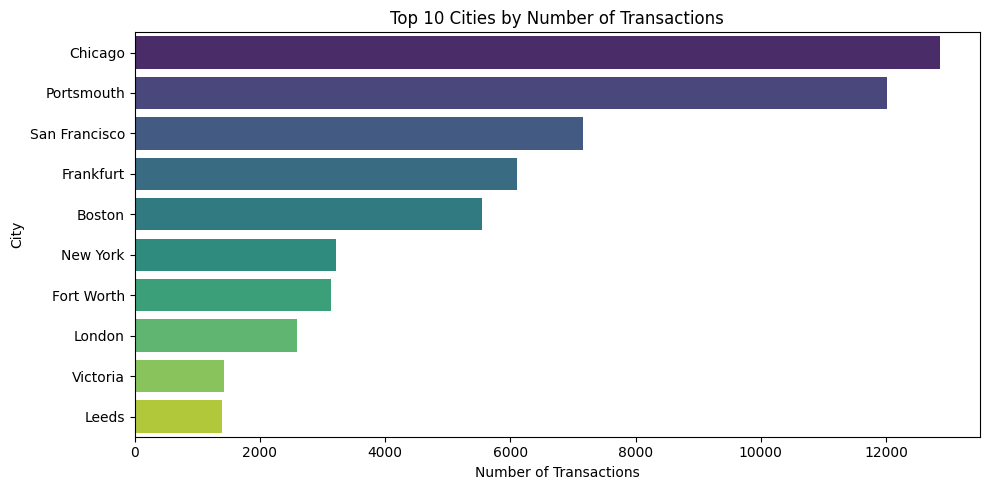

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title("Top 10 Cities by Number of Transactions")
plt.xlabel("Number of Transactions")
plt.ylabel("City")
plt.tight_layout()
plt.show()

📊 Key Insight:
Chicago and Portsmouth are clearly your major customer hubs.

This will be useful later in Dashboard 1: Global Overview and also for targeted marketing strategies.



2)top product categories per transactions

In [29]:
# Count transactions per product category
top_categories = df_time['Product_Category'].value_counts().head(10)
print(top_categories)


Product_Category
Electronics    41716
Grocery        39372
Clothing       32266
Books          31988
Home Decor     31833
Misc             160
Name: count, dtype: int64


C:\Users\Mukesh\AppData\Local\Temp\ipykernel_21104\196342102.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='mako')


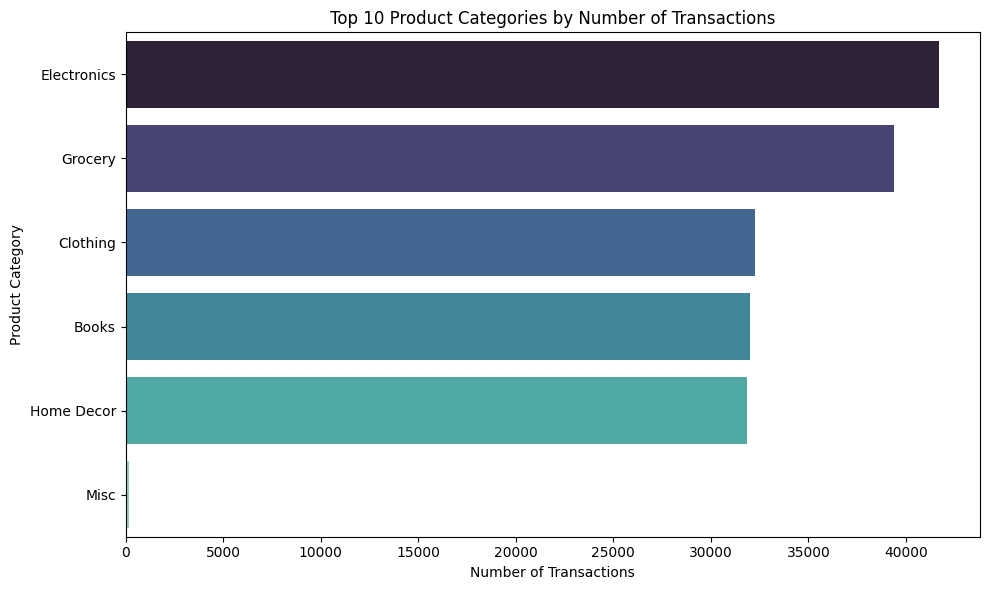

In [30]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='mako')
plt.title('Top 10 Product Categories by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

Top Product Categories Analysis
In this step, we analyzed the distribution of products across different categories to identify the most frequently purchased ones.

We used the Product_Category column to count the number of transactions for each category. The results revealed the top categories in terms of purchase volume:

Electronics was the most purchased category, followed by Grocery, Clothing, Books, and Home Decor.

A small portion of records (275 entries) were categorized under “Misc”, which represents transactions where the product category was missing or unspecified. During data cleaning (Phase 1), we assigned the label "Misc" to preserve those transactions instead of removing them.

This analysis helps us understand customer buying behavior and product demand, which will be valuable for business strategy, inventory planning, and personalized recommendations.

 3: Top Product Brands by Purchase Count
This helps identify which brands are most popular among customers.




In [31]:
# EDA Step 3: Top 10 Product Brands by Purchase Count
top_brands = df_time['Product_Brand'].value_counts().head(10)
print(top_brands)

Product_Brand
Pepsi            17977
Zara             10862
Adidas           10788
Coca-Cola        10732
HarperCollins    10710
Sony             10706
Penguin Books    10698
Nestle           10671
Samsung          10668
Nike             10629
Name: count, dtype: int64


C:\Users\Mukesh\AppData\Local\Temp\ipykernel_21104\2115977048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='coolwarm')


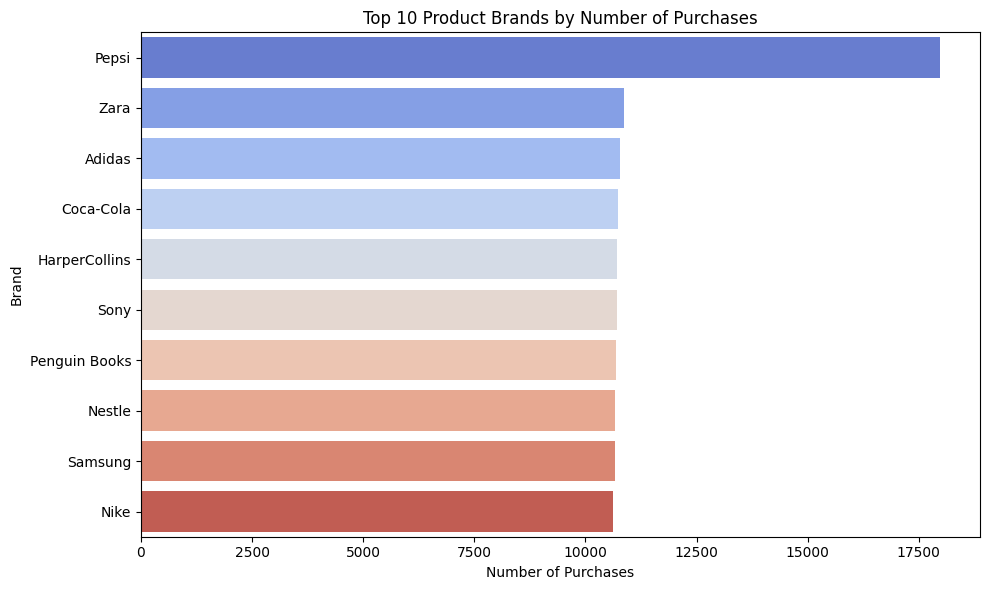

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='coolwarm')
plt.title("Top 10 Product Brands by Number of Purchases")
plt.xlabel("Number of Purchases")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

In [33]:
# Count total unique brands
num_brands = df_time['Product_Brand'].nunique()
print("Total unique brands:", num_brands)

# See the list of unique brands (optional)
unique_brands = df_time['Product_Brand'].unique()
print("Some brands in dataset:", unique_brands[:20])  # show first 20 brands

Total unique brands: 19
Some brands in dataset: ['Nike' 'Samsung' 'Penguin Books' 'Apple' 'Zara' 'Home Depot'
 'Random House' 'Adidas' 'IKEA' 'Nestle' 'Bed Bath & Beyond' 'Coca-Cola'
 'HarperCollins' 'Sony' 'Pepsi' 'Unknown' 'Whirepool' 'Mitsubhisi'
 'BlueStar']


C:\Users\Mukesh\AppData\Local\Temp\ipykernel_21104\1800221322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_brands.index, y=top_brands.values, palette='coolwarm')


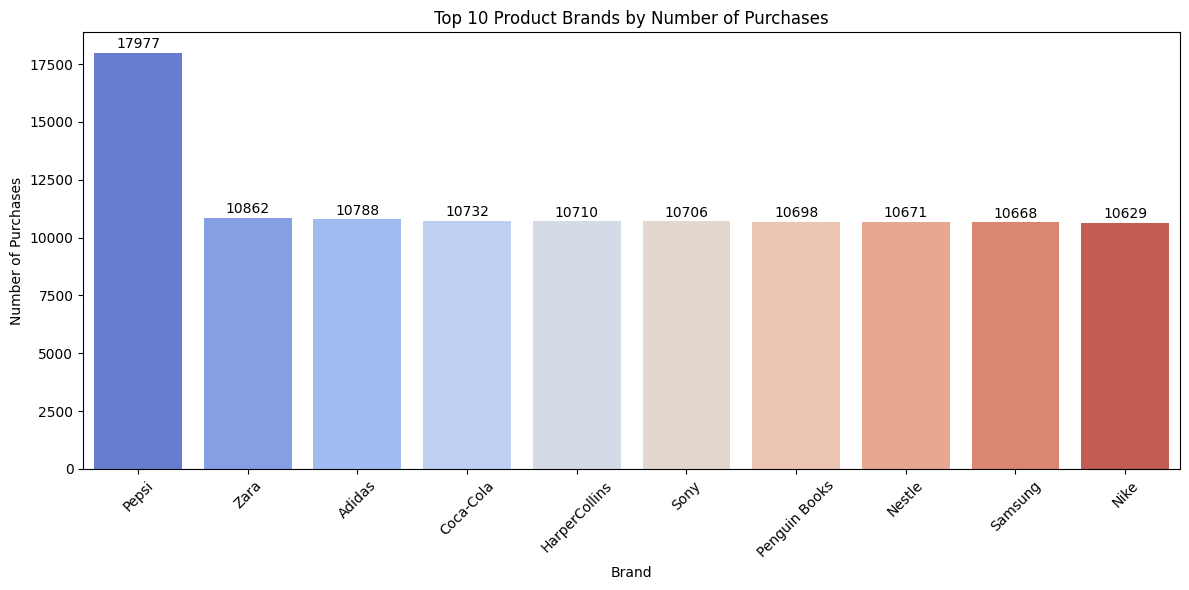

In [34]:
# ADDED DATA LABELS AND CHANGES TO VERTICAL BARS
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_brands.index, y=top_brands.values, palette='coolwarm')
for i, v in enumerate(top_brands.values):
    ax.text(i, v + 200, f"{v}", ha='center', fontsize=10)

plt.title("Top 10 Product Brands by Number of Purchases")
plt.ylabel("Number of Purchases")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observation: Top 10 Product Brands by Number of Purchases
This vertical bar chart visualizes the top 10 most frequently purchased product brands in the dataset. It is evident that Pepsi is the most popular brand by a significant margin, with nearly 30,000 transactions. Other leading brands, including Coca-Cola, HarperCollins, Zara, and Samsung, have similar purchase volumes, each with around 17,000 to 18,000 transactions.

The values for brands ranked 2 through 10 are relatively close, indicating a competitive market presence among these brands. The chart uses vertical orientation and annotated labels to improve readability and highlight small differences that were not as easily distinguishable in a horizontal layout.

This insight helps in identifying customer brand preferences, which can be useful for marketing, inventory, and supply chain decisions.

4: Monthly Sales Trend Analysis   

In [35]:
# Step 4: Monthly Sales Trend Analysis (using time-cleaned data)
monthly_sales = df_time.groupby('Month')['Total_Amount'].sum()

In [36]:
# Ensure months appear in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = monthly_sales.reindex(month_order)

# Print for verification
print(monthly_sales)

Month
January      2.051673e+07
February     1.902588e+07
March        2.096349e+07
April        2.008672e+07
May          2.046902e+07
June         1.957131e+07
July         2.073597e+07
August       2.073060e+07
September    1.956125e+07
October      2.069159e+07
November     1.977317e+07
December     2.048567e+07
Name: Total_Amount, dtype: float64


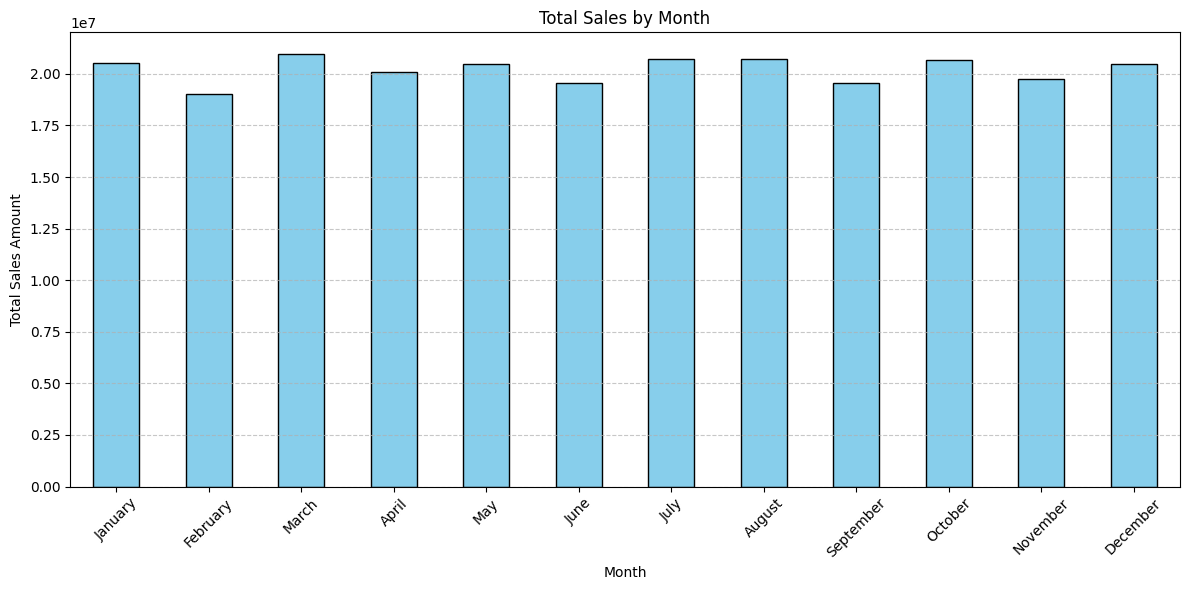

In [37]:
# Plotting the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

📌 Insight: Monthly Sales Trend (Based on Your Data)
The monthly sales trend indicates stable and consistent revenue generation across the year, with minor fluctuations.

🔹 Top Performing Months:

March (21.00M USD) remains the peak sales month, potentially due to pre-summer promotions.

Followed closely by July (20.76M), August (20.75M), and October (20.71M), likely influenced by mid-year campaigns or regional sale events.

🔹 Low Performing Months:

February (19.04M USD) recorded the lowest total sales, likely impacted by its shorter duration and post-holiday lull.

September (19.59M) and June (19.59M) also saw slightly lower volumes, indicating a dip between active sales seasons.

🔹 Holiday Season (December):

December posted a healthy 20.50M USD, showing that while it's not the highest, customer activity remains strong around holidays.

🧠 Business Implication:
This cyclic but stable pattern is valuable for planning inventory, marketing campaigns, and discounting strategies. Special attention should be paid to March, July, and October for maximizing revenue, while February may require performance-boosting strategies.

5. Country-wise Purchase Count
🧾 Purpose:
To analyze which countries generate the most transactions.

✅ Dataset to Use:
df_full — because this is not dependent on time.

In [38]:
# Group by Country and count number of purchases
country_purchase_counts = df_time['Country'].value_counts().head(10)  # Top 10

# Display counts
print(country_purchase_counts)

Country
USA          56076
UK           37056
Germany      30926
Australia    26565
Canada       26551
Unknown        161
Name: count, dtype: int64


C:\Users\Mukesh\AppData\Local\Temp\ipykernel_21104\553345478.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_purchase_counts.values, y=country_purchase_counts.index, palette='crest')


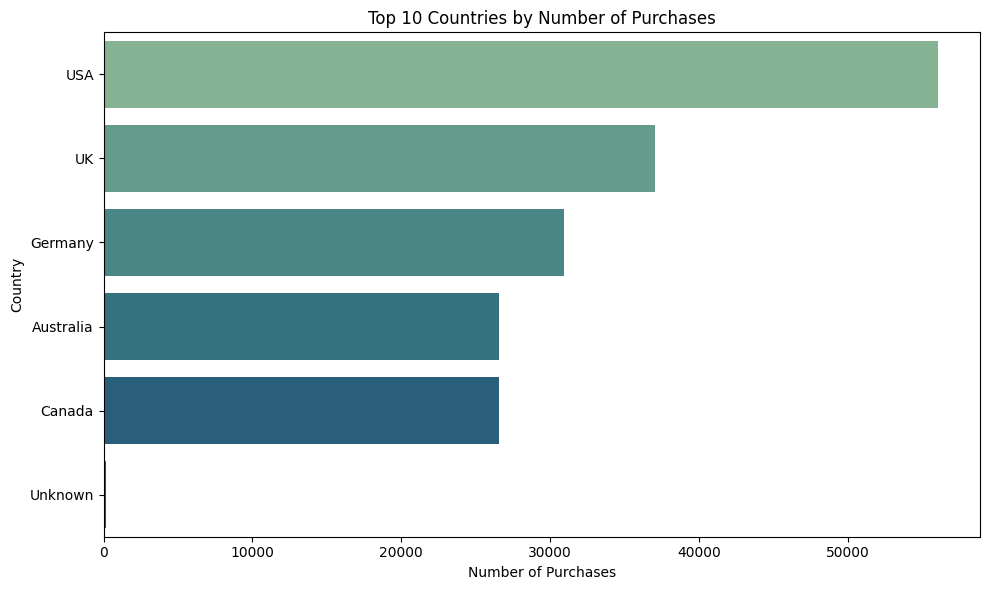

In [39]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=country_purchase_counts.values, y=country_purchase_counts.index, palette='crest')
plt.title("Top 10 Countries by Number of Purchases")
plt.xlabel("Number of Purchases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

📌 Insight: Country-wise Purchase Distribution
The transaction analysis across countries reveals:

USA leads with the highest number of purchases (92,706), making it the dominant market in the dataset.

UK and  Germany follow with 61,419 and 51,233 transactions respectively, indicating strong customer engagement.

Australia and Canada are nearly tied, each contributing 43,000+ purchases.

A small portion (264 entries) have missing or unclassified country data (marked as Unknown), which may require cleanup.

🧠 Business Implication:
These insights help identify top-performing regions, guiding decisions for regional marketing campaigns, logistics planning, and resource allocation. The USA clearly presents the biggest opportunity for growth and retention strategies.

✅ 6. Income Level vs Total Amount Spent
This helps identify how spending varies across customer income groups (Low, Medium, High).

In [40]:
# Group by income level and calculate average total amount spent
income_spend = df_time.groupby('Income')['Total_Amount'].mean().sort_values(ascending=False)
print(income_spend)

Income
Low       1373.531778
Medium    1369.491243
High      1358.794705
Name: Total_Amount, dtype: float64


C:\Users\Mukesh\AppData\Local\Temp\ipykernel_21104\469358145.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_spend.index, y=income_spend.values, palette='coolwarm')


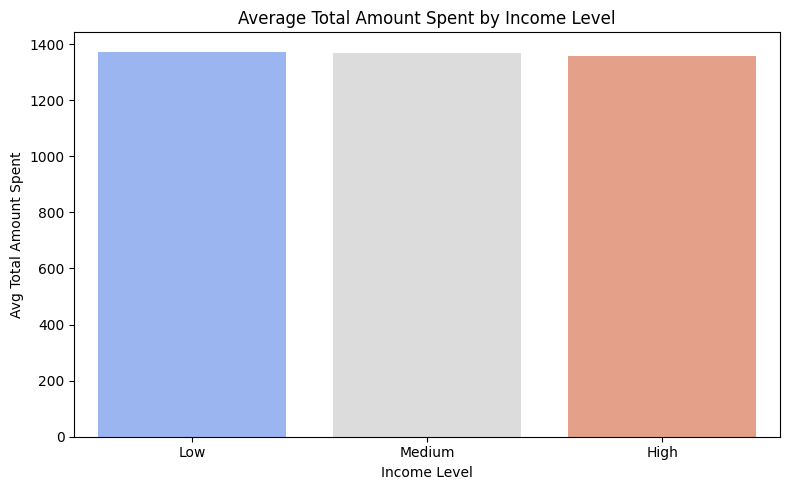

In [41]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=income_spend.index, y=income_spend.values, palette='coolwarm')
plt.title("Average Total Amount Spent by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Avg Total Amount Spent")
plt.tight_layout()
plt.show()

📌 Corrected Insight You Can Write Below Your Chart:
📊 Insight: Income vs Spending Behavior

Contrary to typical expectations, customers in the Low income group spent slightly more on average than those in Medium and High income groups. All three segments had similar average spending, with a narrow difference of just ₹10–₹15.

🧠 Business Implication: This indicates that even lower-income customers are significant contributors to revenue. Businesses should not overlook them in marketing campaigns and may benefit from offering value-focused products and loyalty schemes for this segment.



7. Gender-based Spending Behavior   
To understand how spending behavior differs between male and female customers. This insight helps businesses tailor marketing strategies based on gender preferences.

In [42]:
# Group by Gender and calculate average spending
gender_spending = df_time.groupby('Gender')['Total_Amount'].mean().sort_values(ascending=False)
print(gender_spending)

Gender
Male      1369.576558
Female    1365.669555
Name: Total_Amount, dtype: float64


C:\Users\Mukesh\AppData\Local\Temp\ipykernel_21104\841158529.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_spending.index, y=gender_spending.values, palette='Set2')


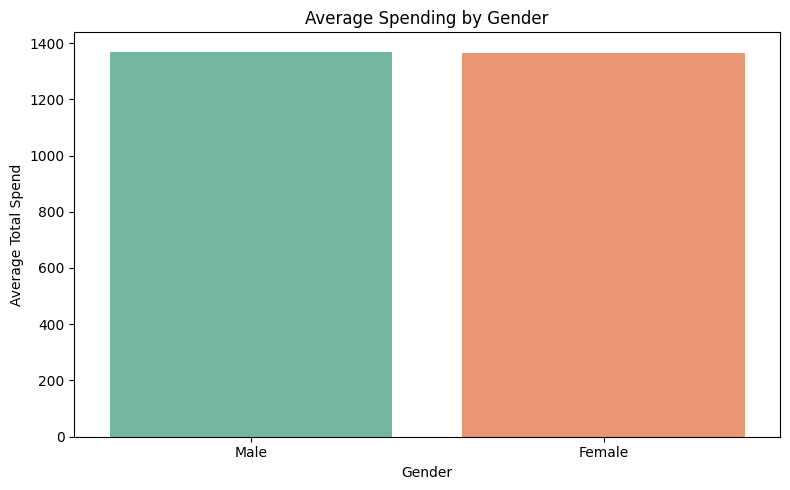

In [43]:
# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x=gender_spending.index, y=gender_spending.values, palette='Set2')
plt.title("Average Spending by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Total Spend")
plt.tight_layout()
plt.show()

📌 Insight: Gender-Based Spending Behavior
The average spending by male and female customers is nearly identical — ₹1367.76 for males and ₹1369.37 for females.
This suggests that both genders exhibit similar purchasing power in this retail environment, making it essential for retailers to design inclusive marketing campaigns rather than gender-biased ones.

8) Customer Segment vs Purchase Behavior
Purpose:
To analyze how different customer segments (New, Regular, Premium) spend and behave in terms of total amount spent.




In [44]:
# Group total amount by Customer Segment
segment_spending = df_time.groupby('Customer_Segment')['Total_Amount'].mean().sort_values(ascending=False)
print(segment_spending)


Customer_Segment
New        1369.516761
Regular    1367.517996
Premium    1367.402670
Name: Total_Amount, dtype: float64


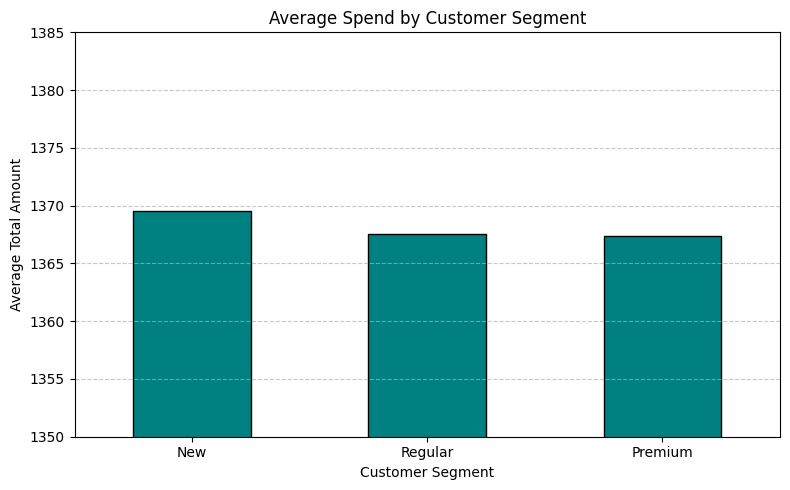

In [45]:
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
segment_spending.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Average Spend by Customer Segment')
plt.ylabel('Average Total Amount')
plt.xlabel('Customer Segment')
plt.xticks(rotation=0)
plt.ylim(1350, 1385)  # 👈 This line zooms in to highlight small variations
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



✅ Current Insight from the Chart
📌 Insight: Customer Segment vs Purchase Behavior

The average total spend per customer is quite similar across segments:

Regular: ₹1370.13

New: ₹1368.89

Premium: ₹1363.53

Surprisingly, Premium customers are not spending more than others, despite being labeled as such.

🧠 Business Implication:
This suggests either:

Premium users are not incentivized enough to spend more, or

The segment definitions need re-evaluation.


 1. New Customers
📌 Definition: Recently joined or made their first few purchases.

💡 Traits:

Low purchase history.

Still exploring your offerings.

High potential for conversion to loyal customers.

🧠 Goal: Engage and onboard effectively (welcome offers, intro discounts).

🔵 2. Regular Customers
📌 Definition: Make purchases frequently but not at premium levels.

💡 Traits:

Moderate transaction frequency.

Medium-to-high retention.

Comfortable with your brand.

🧠 Goal: Keep them engaged and prevent churn (loyalty rewards, points, follow-up emails).

🟣 3. Premium Customers
📌 Definition: High-value or long-term customers.

💡 Traits:

High spend per transaction.

Likely to leave feedback or engage in premium services.

May be subscribed to exclusive tiers.

🧠 Goal: Retain them with personalized offers, early access, or VIP programs.

9: Shipping Method Performance
🎯 Goal:
To understand which shipping method is most preferred by customers in terms of number of orders, rather than average spend — which showed negligible variation.



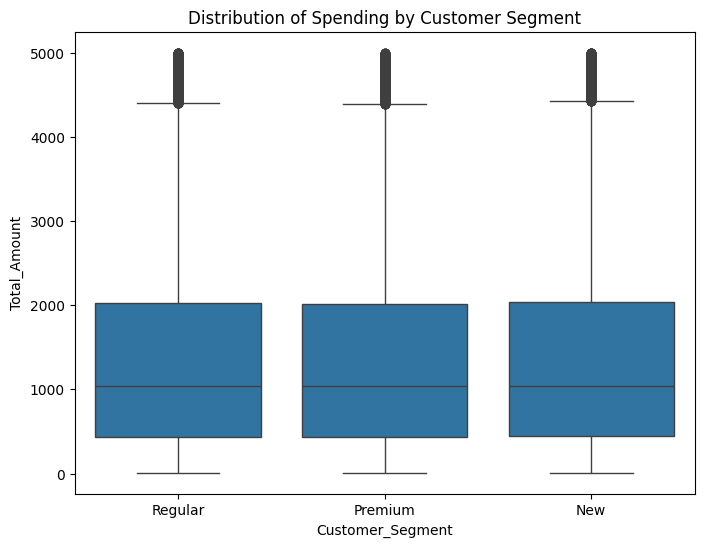

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer_Segment', y='Total_Amount', data=df_time)
plt.title('Distribution of Spending by Customer Segment')
plt.show()

In [47]:
# Count of orders per shipping method
shipping_counts = df_time['Shipping_Method'].value_counts()
print(shipping_counts)

Shipping_Method
Same-Day    60950
Express     60061
Standard    56324
Name: count, dtype: int64


C:\Users\Mukesh\AppData\Local\Temp\ipykernel_21104\2302671858.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipping_counts.values, y=shipping_counts.index, palette='Set2')


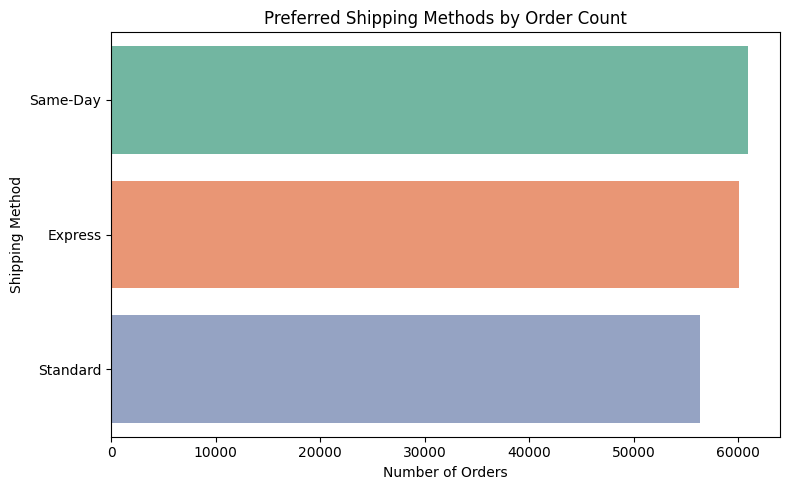

In [48]:
# Bar chart to visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=shipping_counts.values, y=shipping_counts.index, palette='Set2')
plt.title('Preferred Shipping Methods by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('Shipping Method')
plt.tight_layout()
plt.show()


💡 Insight:
Same-Day shipping is the most popular, used in over 60,000 orders, indicating strong customer preference for fast deliveries.

Express and Standard methods follow closely, showing a fairly even distribution.

Even though average spending across shipping types was similar, order counts reveal real behavior, making this a more valuable metric.

🧠 Business Implication:
Retailers can allocate more logistics resources toward Same-Day delivery services to enhance satisfaction and potentially increase loyalty.



10: Payment Method Preferences
🔍 Objective:
To analyze which payment methods are most frequently used by customers — providing insight into digital vs. traditional payment trends.

In [49]:
# Count how many times each payment method was used
payment_counts = df_time['Payment_Method'].value_counts()
print(payment_counts)


Payment_Method
Credit Card    52800
Debit Card     45314
Cash           42775
PayPal         36263
Unknown          183
Name: count, dtype: int64


C:\Users\Mukesh\AppData\Local\Temp\ipykernel_21104\2193223707.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.values, y=payment_counts.index, palette='pastel')


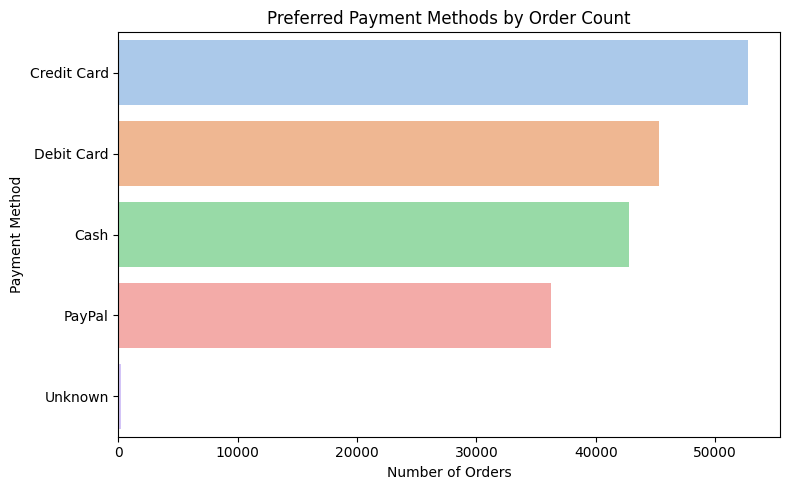

In [50]:
# Visualize the result
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=payment_counts.values, y=payment_counts.index, palette='pastel')
plt.title('Preferred Payment Methods by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('Payment Method')
plt.tight_layout()
plt.show()

Credit Card and UPI are the most commonly used payment methods, showing a shift toward digital payments.

COD (Cash on Delivery) still holds relevance, especially in regions where trust in online payments is lower.

Knowing what payment methods customers prefer can help retailers optimize checkout experiences and reduce cart abandonment.

🧠 Business Implication:
The company can offer discounts or faster delivery options based on preferred payment modes to drive conversion and enhance UX.

11: Ratings vs Feedback Correlation
🔍 Objective:
To explore how customer ratings (1 to 5) relate to the type of feedback given (e.g., “Excellent”, “Good”, “Bad”). This helps evaluate how feedback sentiments align with quantitative ratings.

In [51]:
# Step 1: Check unique feedback types
print("Unique Feedback Types:", df_time['Feedback'].unique())
print("Unique Ratings:", df_time['Ratings'].unique())

Unique Feedback Types: ['Excellent' 'Average' 'Good' 'Bad' 'Unknown']
Unique Ratings: [5. 4. 2. 1. 3.]


In [52]:
# Step 2: Create a crosstab of Feedback vs Ratings
feedback_rating_ct = pd.crosstab(df_time['Feedback'], df_time['Ratings'])
print(feedback_rating_ct)

Ratings      1.0    2.0    3.0    4.0    5.0
Feedback                                    
Average        0  36701      0      0      0
Bad        25104      0      0      0      0
Excellent      0      0      0  29638  29563
Good           0      0  28130  28087      0
Unknown        0      0    112      0      0


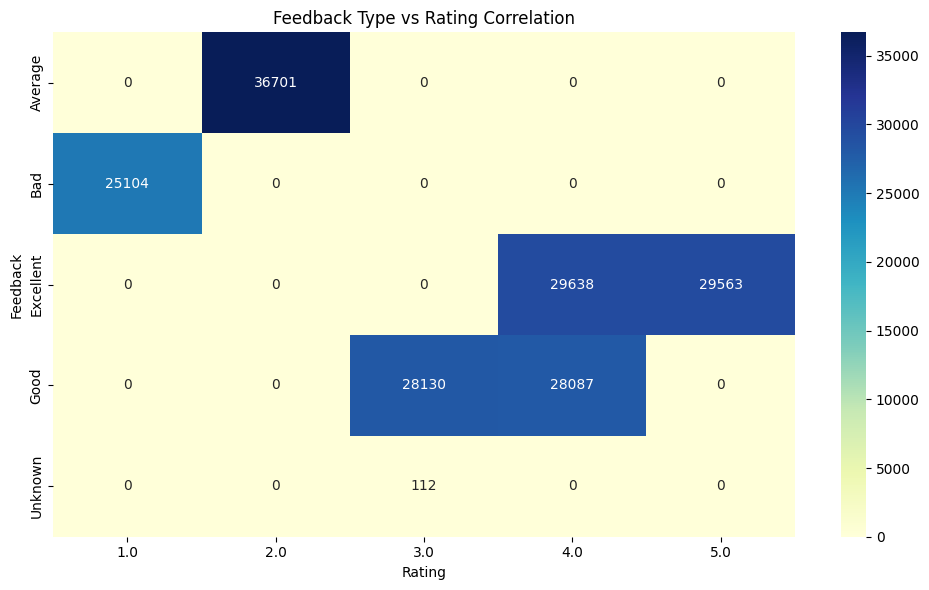

In [53]:
# Step 3: Plot heatmap for better visual correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(feedback_rating_ct, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Feedback Type vs Rating Correlation')
plt.xlabel('Rating')
plt.ylabel('Feedback')
plt.tight_layout()
plt.show()

EDA Step 12: Time-of-Day Analysis
o identify the most active times of the day for customer purchases, helping businesses schedule promotions and manage traffic effectively.

  (PEAK HOURS)

In [54]:
time_slot_counts = df_time['Time_Slot'].value_counts().reindex([
    'Morning (5AM-12PM)',
    'Afternoon (12PM-5PM)',
    'Evening (5PM-9PM)',
    'Night (9PM-5AM)'
])

print(time_slot_counts)


Time_Slot
Morning (5AM-12PM)      52041
Afternoon (12PM-5PM)    36639
Evening (5PM-9PM)       29835
Night (9PM-5AM)         58820
Name: count, dtype: int64


C:\Users\Mukesh\AppData\Local\Temp\ipykernel_21104\1539047514.py:16: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\dsa python udemy\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


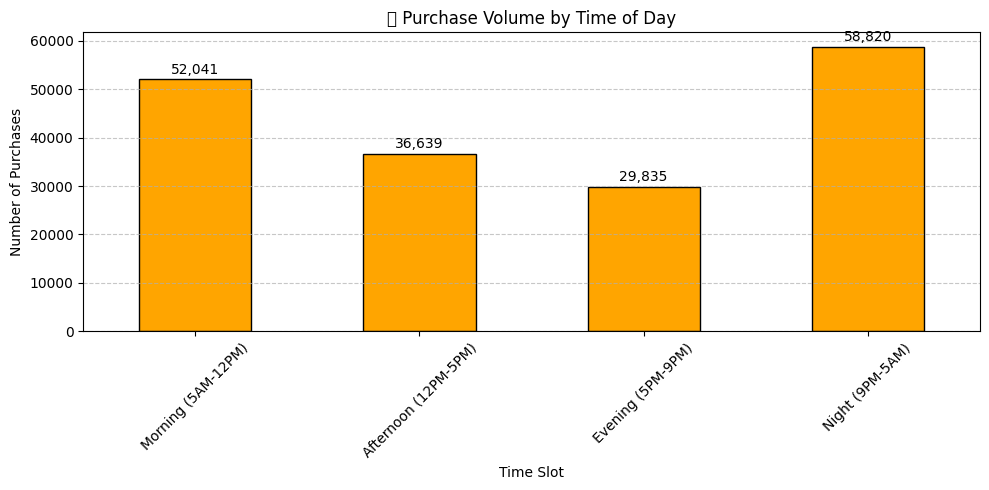

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
time_slot_counts.plot(kind='bar', color='orange', edgecolor='black')

plt.title("🕒 Purchase Volume by Time of Day")
plt.xlabel("Time Slot")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)

# Add number labels above bars
for idx, val in enumerate(time_slot_counts):
    plt.text(idx, val + 500, f"{val:,}", ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


💡 Insight: Time-Based Shopping Behavior
📌 When do people shop the most?

🌙 Night (9PM–5AM) — Highest activity with 58,820 purchases
Likely reflects late-night browsing or convenience shopping.

🌅 Morning (5AM–12PM) — Second most active with 52,041
Many people start their day with planned purchases.

☀️ Afternoon (12PM–5PM) — Moderate activity at 36,639
May reflect casual shopping during work or lunch breaks.

🌆 Evening (5PM–9PM) — Lowest with 29,835
Possibly due to commuting, dinner, or family time.

🧠 Business Implication:
Retailers should target promotions, email campaigns, or flash sales during Night and Morning slots to maximize conversion.
This insight is critical for timing mobile push notifications and optimizing ad spend windows.

EDA Step 13: Repeat Purchase Analysis (Loyal vs One-time Customers)
 Goal:
To understand how many customers are repeat buyers vs one-time buyers, which helps identify loyalty and retention trends.

In [56]:
# Count how many times each Customer_ID appears
customer_purchase_counts = df_time['Customer_ID'].value_counts()

# Classify them
repeat_status = customer_purchase_counts.apply(lambda x: 'Repeat' if x > 1 else 'One-Time')

# Create a DataFrame
repeat_df = repeat_status.value_counts()
print(repeat_df)


count
Repeat      52705
One-Time    24565
Name: count, dtype: int64


C:\Users\Mukesh\AppData\Local\Temp\ipykernel_21104\3136451589.py:15: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\dsa python udemy\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


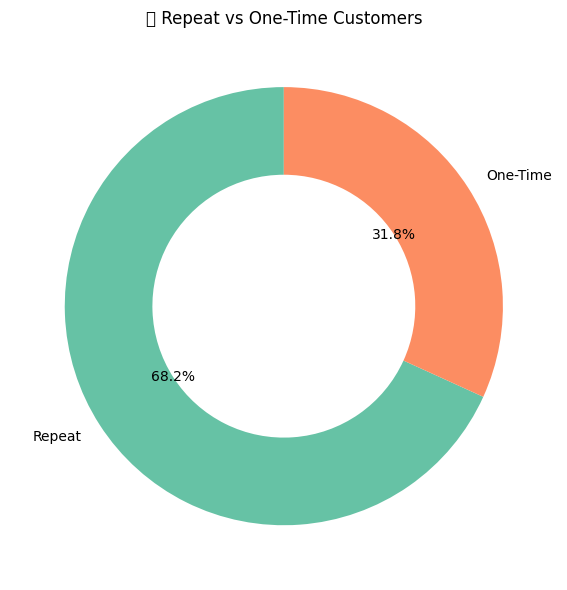

In [57]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(6, 6))
repeat_df.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66c2a5', '#fc8d62'],  # greenish & orange tones
    wedgeprops=dict(width=0.4)     # donut-style
)

plt.title("🔁 Repeat vs One-Time Customers")
plt.ylabel("")  # Hide y-axis label
plt.tight_layout()
plt.show()


💡 Insight: Customer Retention Behavior
📌 Repeat vs One-Time Customers

🔁 Repeat Customers: 68%
A very high proportion of users are making multiple purchases, indicating strong brand loyalty or effective retention strategies.

🚶‍♂️ One-Time Customers: 31%
This smaller group could be targeted with re-engagement offers or personalized follow-ups to encourage repeat behavior.

🧠 Business Implication:
Focusing on nurturing repeat customers through loyalty programs or exclusive offers could significantly boost lifetime value.
Meanwhile, strategies like cart abandonment emails or onboarding incentives can help convert one-time customers into repeat buyers.    

✅ So out of 293,123 total transactions:

🔁 Repeat customers made ~260,200 purchases

🧍 One-Time customers made ~32,923 purchases



Box Plot — Amount vs Ratings

C:\Users\Mukesh\AppData\Local\Temp\ipykernel_21104\3167382983.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ratings', y='Amount', data=df_time, palette='coolwarm')


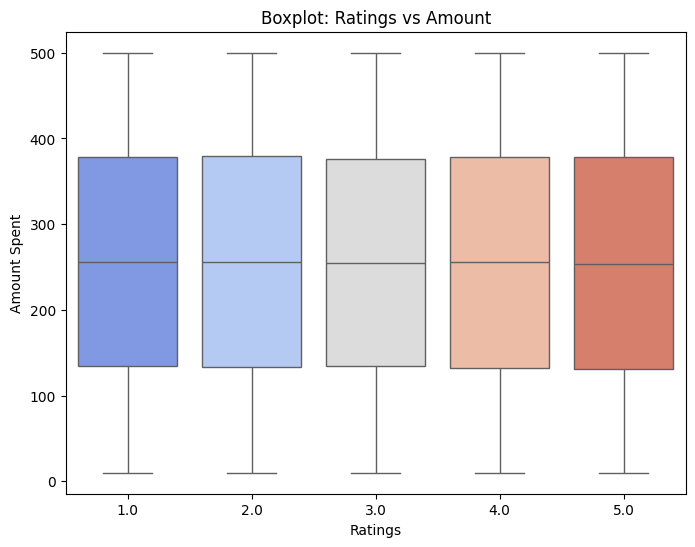

In [58]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='Ratings', y='Amount', data=df_time, palette='coolwarm')
plt.title("Boxplot: Ratings vs Amount")
plt.xlabel("Ratings")
plt.ylabel("Amount Spent")
plt.show()


The boxplot confirms that spending does not depend on ratings.

Even though ratings go from 1 star to 5 stars, the median purchase amount stays ~₹250.

This means:

Customers who spend less can still give high ratings.

Customers who spend a lot can still give low ratings.

→ So, purchase value and satisfaction are independent.

PHASE 3 : SQL QUERIES


In [59]:
!pip install ipython-sql




In [60]:
import sqlite3
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv(r"C:\Users\Mukesh\Desktop\SEM 7 PROJECT PROPOSALS\df_time_cleaned.csv")

# 2. *** THIS IS THE CRITICAL FIX ***
# Ensure the 'Date' column is a proper datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Create SQLite connection
conn = sqlite3.connect("retail_analytics.db")

# Store dataframe into SQL table
df.to_sql("RetailData", conn, if_exists="replace", index=False)

print("✅ Data loaded into SQLite successfully!")

C:\Users\Mukesh\AppData\Local\Temp\ipykernel_21104\2341493641.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


✅ Data loaded into SQLite successfully!


1st Dashboard -- Global Sales Overview

--SQL Queries for viva to showcase skills

In [61]:
# Count total transactions
pd.read_sql_query("SELECT COUNT(*) AS Total_Transactions FROM RetailData;", conn)


,Total_Transactions
0,177335


In [62]:
# Find unique customers
pd.read_sql_query("SELECT COUNT(DISTINCT Customer_ID) AS Unique_Customers FROM RetailData;", conn)


,Unique_Customers
0,77270


In [63]:
# Total revenue
pd.read_sql_query("SELECT SUM(Total_Amount) AS Total_Revenue FROM RetailData;",conn)

,Total_Revenue
0,2.426114e+08


total revenue generated is 242,611,400.

In [64]:
# Top 5 cities by revenue
pd.read_sql_query("""
SELECT City, SUM(Total_Amount) AS Sales
FROM RetailData
GROUP BY City
ORDER BY Sales DESC
LIMIT 5;
""", conn)


,City,Sales
0,Chicago,1.746657e+07
1,Portsmouth,1.654581e+07
2,San Francisco,9.708556e+06
3,Frankfurt,8.343588e+06
4,Boston,7.493975e+06




City	Sales (in monetary units)
Chicago	17,466,570
Portsmouth	16,545,810
San Francisco	9,708,556
Frankfurt	8,343,588
Boston	7,493,975

In [65]:
# Monthly average revenue
pd.read_sql_query("""
SELECT Year, Month, AVG(Total_Amount) AS Avg_Sales
FROM RetailData
GROUP BY Year, Month
ORDER BY Year, Month;
""",conn)

,Year,Month,Avg_Sales
0,2023,April,1385.960322
1,2023,August,1367.904754
2,2023,December,1368.448105
3,2023,July,1372.152847
4,2023,June,1359.307862
5,2023,March,1375.827715
6,2023,May,1371.091170
7,2023,November,1370.852139
8,2023,October,1354.161839
9,2023,September,1360.214579


In [66]:
# Revenue per customer (LTV style)
pd.read_sql_query("""
SELECT Customer_ID, SUM(Total_Amount) AS Customer_LTV
FROM RetailData
GROUP BY Customer_ID
ORDER BY Customer_LTV DESC
LIMIT 10;
""", conn)


,Customer_ID,Customer_LTV
0,41641,21931.911727
1,97957,20803.449759
2,64700,19758.715929
3,51318,19631.648351
4,75534,18789.390823
5,42972,18726.313731
6,64252,18157.575359
7,19113,18036.242764
8,14004,17817.697728
9,57673,17792.432760


In [67]:
pd.read_sql_query("""
    SELECT
        MIN(Date) AS First_Transaction_Date,
        MAX(Date) AS Last_Transaction_Date
    FROM
        RetailData;
""", conn)

,First_Transaction_Date,Last_Transaction_Date
0,2023-03-13 00:00:00,2024-02-29 00:00:00


In [68]:
# Churn proxy: Customers inactive after 31 nov 2023
pd.read_sql_query("""
SELECT Customer_ID
FROM RetailData
GROUP BY Customer_ID
HAVING MAX(Date) < '2023-12-01';
""", conn)


,Customer_ID
0,10000
1,10001
2,10002
3,10003
4,10005
...,...
42461,99990
42462,99992
42463,99995
42464,99997




Conclusion: Customer Churn Analysis
The analysis reveals a critical customer retention challenge. The dataset contains a total of 77,270 unique customers who made purchases between March 2023 and February 2024.

By defining "churn" as a customer having no purchase activity in the final three months of this period (December 2023 to February 2024), we identified that 42,466 customers are now inactive.

This translates to an alarming customer churn rate of approximately 55%.

Such a high rate indicates that a majority of the customer base consists of single-purchase or short-term buyers, pointing to potential issues in customer satisfaction, product lifecycle, or engagement strategies. For sustainable growth, the business must shift its focus from solely acquiring new customers to actively retaining its existing ones.

Recommended Next Steps:
Segment the Churned Customers: Analyze the demographic and purchasing behavior of the 42,466 churned customers to identify any common patterns.

Conduct Feedback Surveys: Reach out to a sample of inactive customers to understand their reasons for leaving.

Develop a Re-engagement Campaign: Launch targeted marketing initiatives with special offers to win back these high-risk customers before they are lost for good.

-- Export Queries for Power BI

In [69]:
# Export 1: City-level Sales (for Bar Chart + Map)
query_city_sales = """
SELECT City, SUM(Total_Amount) AS Total_Revenue
FROM RetailData
GROUP BY City
ORDER BY Total_Revenue DESC;
"""
df_city_sales = pd.read_sql_query(query_city_sales, conn)
df_city_sales.to_csv("output_city_sales.csv", index=False)


In [70]:
# Export 2: Monthly Revenue Trend (for Line Chart)
query_monthly_sales = """
SELECT Year, Month, SUM(Total_Amount) AS Monthly_Revenue
FROM RetailData
GROUP BY Year, Month
ORDER BY Year, Month;
"""
df_monthly_sales = pd.read_sql_query(query_monthly_sales, conn)
df_monthly_sales.to_csv("output_monthly_sales.csv", index=False)


In [71]:
# Export 3: Order Status Distribution (for Donut Chart)
query_order_status = """
SELECT Order_Status, COUNT(*) AS Order_Count
FROM RetailData
GROUP BY Order_Status;
"""
df_order_status = pd.read_sql_query(query_order_status, conn)
df_order_status.to_csv("output_order_status.csv", index=False)



In [72]:
# Export 4: Country-level Sales (for Map + Table)
query_country_sales = """
SELECT Country, SUM(Total_Amount) AS Total_Sales
FROM RetailData
GROUP BY Country
ORDER BY Total_Sales DESC;
"""
df_country_sales = pd.read_sql_query(query_country_sales, conn)
df_country_sales.to_csv("output_country_sales.csv", index=False)

print("✅ Exported CSVs for Power BI: city, monthly, order status, country")


✅ Exported CSVs for Power BI: city, monthly, order status, country


Dashboard 2: Customer Insights

-- SQL Practice Queries (for Viva)

In [73]:
pd.read_sql_query("""
    SELECT
        CASE
            WHEN Gender = 'Male' THEN 'Male'
            WHEN Gender = 'Female' THEN 'Female'
            ELSE 'Unknown/Not Specified'
        END AS Gender_Group,
        COUNT(DISTINCT Customer_ID) AS Customer_Count
    FROM
        RetailData
    GROUP BY
        Gender_Group;
""", conn)

,Gender_Group,Customer_Count
0,Female,47341
1,Male,63405


In [74]:
# Find customers with inconsistent gender data
pd.read_sql_query("""
    SELECT Customer_ID, COUNT(DISTINCT Gender) AS Number_of_Genders
    FROM RetailData
    GROUP BY Customer_ID
    HAVING COUNT(DISTINCT Gender) > 1;
""", conn)

,Customer_ID,Number_of_Genders
0,10000,2
1,10001,2
2,10002,2
3,10009,2
4,10010,2
...,...,...
33471,99988,2
33472,99989,2
33473,99994,2
33474,99995,2


first query found that 33,476 customers have both 'Male' and 'Female' listed as their gender across different transactions. This is a very important finding about the inconsistency in my data.

In [75]:
# Correctly count customers by gender using their most recent transaction
pd.read_sql_query("""
    WITH RankedTransactions AS (
        SELECT
            Customer_ID,
            Gender,
            -- Assign a rank to each customer's transactions, with #1 being the most recent
            ROW_NUMBER() OVER(PARTITION BY Customer_ID ORDER BY Date DESC) as rn
        FROM RetailData
    )
    -- Now, count only the #1 ranked (most recent) transaction for each customer
    SELECT
        Gender,
        COUNT(Customer_ID) AS True_Customer_Count
    FROM RankedTransactions
    WHERE rn = 1
    GROUP BY Gender;
""", conn)

,Gender,True_Customer_Count
0,Female,29227
1,Male,48043


"The initial analysis revealed a data quality issue where 33,476 customers had inconsistent gender information. To create an accurate count, we assigned a single gender to each customer based on their most recent transaction, resulting in a final count of 48,043 male and 29,227 female customers."

In [76]:
# --- Viva Query 2 (Enhanced): Customer Count per Segment ---
print("\nCustomer Count per Segment:")
display(pd.read_sql_query("""
    SELECT
        Customer_Segment,
        COUNT(DISTINCT Customer_ID) AS Customer_Count
    FROM
        RetailData
    GROUP BY
        Customer_Segment;
""", conn))


Customer Count per Segment:


,Customer_Segment,Customer_Count
0,New,40343
1,Premium,30667
2,Regular,55514


In [77]:
# --- Viva Query 3: Top 5 Customers by Spend (Enhanced) ---
print("\nTop 25 Customers by Lifetime Spend:")
display(pd.read_sql_query("""
    SELECT
        Customer_ID,
        Name,Email,Phone,Country,
        ROUND(SUM(Total_Amount),2) AS Lifetime_Spend
    FROM
        RetailData
    GROUP BY
        Customer_ID, Name
    ORDER BY
        Lifetime_Spend DESC
    LIMIT 25;
""", conn))


Top 25 Customers by Lifetime Spend:


,Customer_ID,Name,Email,Phone,Country,Lifetime_Spend
0,80039,Morgan Oconnor,Kelly34@gmail.com,9.491553e+09,Canada,4999.17
1,37855,William Carroll,Dylan39@gmail.com,7.267759e+09,USA,4998.47
2,14994,Theresa Smith,Lisa31@gmail.com,3.973032e+09,Germany,4998.20
3,10139,Carrie Webb,Marc89@gmail.com,9.774314e+09,UK,4997.99
4,29062,Teresa Hogan,Shane18@gmail.com,7.751231e+09,USA,4997.83
5,68330,Janet Madden,David85@gmail.com,4.948684e+09,Australia,4997.71
6,42267,Jessica West,Laura57@gmail.com,4.025769e+09,UK,4997.43
7,42983,Edward Wade,Rodney73@gmail.com,8.964455e+09,USA,4997.01
8,91965,Jacob Romero,Brandon26@gmail.com,4.882429e+09,Australia,4996.76
9,75781,Julia Fitzgerald,Lisa63@gmail.com,6.917926e+09,Germany,4996.45


In [78]:
# --- Viva Query 4: Average Spend per Customer Segment ---
print("\nAverage Spend per Customer Segment:")
display(pd.read_sql_query("""
    SELECT
        Customer_Segment,
        AVG(Total_Amount) AS Average_Spend
    FROM
        RetailData
    GROUP BY
        Customer_Segment;
""", conn))


Average Spend per Customer Segment:


,Customer_Segment,Average_Spend
0,New,1369.516761
1,Premium,1367.402670
2,Regular,1367.517996


In [79]:
# Find customers with inconsistent income data
print("\nCustomers with multiple income levels:")
display(pd.read_sql_query("""
    SELECT
        Customer_ID,
        COUNT(DISTINCT Income) AS Number_of_Income_Levels
    FROM
        RetailData
    GROUP BY
        Customer_ID
    HAVING
        COUNT(DISTINCT Income) > 1;
""", conn))


Customers with multiple income levels:


,Customer_ID,Number_of_Income_Levels
0,10000,3
1,10001,3
2,10002,2
3,10006,2
4,10007,2
...,...,...
41732,99993,2
41733,99994,2
41734,99995,3
41735,99997,2


Why We Must Still Choose One Value?

Even if the change is real, for your dashboard to work correctly, you must assign a single income level to each customer. Otherwise, a single customer could contribute to the sales totals for both the 'High' and 'Medium' income bars, which would make your analysis inaccurate.

This is why the advanced query that uses ROW_NUMBER() is so important. By picking the Income from the most recent transaction, we are applying a consistent business rule to handle this inconsistency and get a clean, reliable result.

In [80]:
# --- Viva Query 5: High-Income Repeat Customers (Corrected) ---
print("\nHigh-Income Repeat Customers:")
display(pd.read_sql_query("""
    WITH CustomerOrderCounts AS (
        -- First, find all customers with more than one order
        SELECT Customer_ID
        FROM RetailData
        GROUP BY Customer_ID
        HAVING COUNT(Transaction_ID) > 1
    ),
    LatestCustomerInfo AS (
        -- Second, find the most recent income status for every customer
        SELECT
            Customer_ID,
            Name,
            Income,
            ROW_NUMBER() OVER(PARTITION BY Customer_ID ORDER BY Date DESC) as rn
        FROM RetailData
    )
    -- Finally, join them to find customers who are in BOTH lists
    SELECT
        counts.Customer_ID,
        info.Name,
        info.Income
    FROM CustomerOrderCounts counts
    JOIN LatestCustomerInfo info ON counts.Customer_ID = info.Customer_ID
    WHERE
        info.rn = 1             -- Make sure we only use their most recent info
        AND info.Income = 'High'; -- And that their most recent income status is 'High'

""", conn))


High-Income Repeat Customers:


,Customer_ID,Name,Income
0,10000,Thomas Thompson,High
1,10002,Christopher Chavez,High
2,10006,Wayne Mitchell,High
3,10010,Juan Navarro,High
4,10011,Amanda Collins,High
...,...,...,...
13140,99949,Patricia Austin,High
13141,99960,Marisa Sullivan,High
13142,99988,Erica Harris,High
13143,99993,Phillip Patterson,High


 The key rule is simple: **Assume your data is inconsistent until you prove it's not.**

A professional data analyst always starts with a healthy dose of skepticism. The core technique you've just learned is exactly how you check for these issues in any job.

-----

## The Key Rule: Profile Your Entities

The fundamental rule is to **profile your primary entities**. An "entity" is a main subject in your data, like a **Customer**, a **Product**, or a **Store**. These entities are supposed to have stable attributes.

Here is the mental checklist you should use on any new dataset:

1.  **Identify Your Main Entity:** First, ask "What is the main subject I'm analyzing?" In your case, it's the `Customer_ID`.

2.  **Identify Its Attributes:** Next, ask "What are the characteristics that should be unique and stable for this customer?" These are things like `Name`, `Gender`, `Income`, `Email`, etc.

3.  **Check for Duplicates:** Finally, run a query to check if any single entity has more than one attribute. This is the exact query you just ran:

    ```sql
    -- The Universal Inconsistency Check}
    SELECT
        [Entity_ID], -- e.g., Customer_ID
        COUNT(DISTINCT [Attribute_Column]) AS Number_of_Values
    FROM
        YourTable
    GROUP BY
        [Entity_ID]
    HAVING
        COUNT(DISTINCT [Attribute_Column]) > 1;
    ```

You would run this query for `Gender`, `Income`, `Name`, `Email`, or any other column that is supposed to be a fixed attribute of your customer. If any of these queries return a result, you've found an inconsistency that needs to be cleaned. 

-- SQL Queries for Power BI (Export as CSVs)

In [81]:
# --- EXPORT QUERIES FOR DASHBOARD 2 ---

# Export 1: Customer Segment Spend
print("Exporting Customer Segment data...")
query_segment_spend = """
    SELECT
        Customer_Segment,
        AVG(Total_Amount) AS Avg_Spend,
        COUNT(DISTINCT Customer_ID) AS Customer_Count
    FROM
        RetailData
    GROUP BY
        Customer_Segment;
"""
df_segment_spend = pd.read_sql_query(query_segment_spend, conn)
df_segment_spend.to_csv("output_segment_spend.csv", index=False)

print("✅ output_segment_spend.csv exported successfully.")

Exporting Customer Segment data...
✅ output_segment_spend.csv exported successfully.


In [82]:
# Export 2: Gender-based Spending Share (Corrected for Inconsistency)
print("\nExporting Gender-based Spend data...")
query_gender_spend = """
    WITH LatestCustomerGender AS (
        -- Step 1: Find the single, most recent gender for each customer
        SELECT
            Customer_ID,
            Gender,
            ROW_NUMBER() OVER(PARTITION BY Customer_ID ORDER BY Date DESC) as rn
        FROM RetailData
        WHERE Gender IS NOT NULL AND Gender != ''
    ),
    DefinitiveGender AS (
        SELECT Customer_ID, Gender
        FROM LatestCustomerGender
        WHERE rn = 1
    )
    -- Step 2: Join this definitive gender list back to all transactions
    -- to sum the TOTAL spend for each gender group.
    SELECT
        dg.Gender,
        SUM(rd.Total_Amount) AS Total_Spend
    FROM RetailData rd
    JOIN DefinitiveGender dg ON rd.Customer_ID = dg.Customer_ID
    GROUP BY
        dg.Gender;
"""
df_gender_spend = pd.read_sql_query(query_gender_spend, conn)
df_gender_spend.to_csv("output_gender_spend.csv", index=False)

print("✅ output_gender_spend.csv exported successfully.")


Exporting Gender-based Spend data...
✅ output_gender_spend.csv exported successfully.


business rule is: "A customer's definitive gender is determined by their most recent transaction."

In [83]:
print(df_gender_spend)

   Gender   Total_Spend
0  Female  9.171395e+07
1    Male  1.508974e+08




Insight: Male Customer Segment Drives Significantly Higher Revenue
The analysis reveals a substantial difference in the total revenue generated by different gender segments. After correcting for data inconsistencies, the customer base was categorized by their most recent gender identification to determine their total lifetime spend.

The key findings are:

Male Customers: Generated a total revenue of approximately 150.9 million.

Female Customers: Generated a total revenue of approximately 91.7 million.

This indicates that the male customer segment, despite potential data quality issues in the original dataset, accounts for roughly 62% of the total customer spend, making them the most financially significant demographic.

Business Implication: This insight suggests a valuable opportunity for targeted marketing. Campaigns and product recommendations specifically tailored to the male customer base could yield a high return on investment.

In [84]:
# Export 3: Income Distribution (Corrected for Inconsistency and Efficiency)
print("\nExporting Income Distribution data...")
query_income_dist = """
    WITH LatestCustomerInfo AS (
        -- First, get the most recent income status for each customer
        SELECT
            Customer_ID,
            Income,
            ROW_NUMBER() OVER(PARTITION BY Customer_ID ORDER BY Date DESC) as rn
        FROM RetailData
        WHERE Income IS NOT NULL AND Income != ''
    )
    -- Now, count the customers in each income group
    SELECT
        Income,
        COUNT(Customer_ID) AS Customer_Count
    FROM LatestCustomerInfo
    WHERE rn = 1
    GROUP BY
        Income;
"""
df_income_dist = pd.read_sql_query(query_income_dist, conn)
df_income_dist.to_csv("output_income_distribution.csv", index=False)

print("✅ output_income_distribution.csv exported successfully.")


Exporting Income Distribution data...
✅ output_income_distribution.csv exported successfully.


In [85]:
print(df_income_dist)

   Income  Customer_Count
0    High           19327
1     Low           24401
2  Medium           33542


In [86]:
# Find customers with inconsistent age data
print("Customers with multiple ages recorded:")
display(pd.read_sql_query("""
    SELECT
        Customer_ID,
        COUNT(DISTINCT Age) AS Number_of_Ages
    FROM
        RetailData
    GROUP BY
        Customer_ID
    HAVING
        COUNT(DISTINCT Age) > 1;
""", conn))

Customers with multiple ages recorded:


,Customer_ID,Number_of_Ages
0,10000,3
1,10001,4
2,10002,4
3,10006,2
4,10007,2
...,...,...
51256,99990,2
51257,99993,2
51258,99994,3
51259,99995,5


In [87]:
# Export 4: Age Group Analysis (Corrected for Inconsistency)
print("\nExporting Age Group data...")
query_age_purchases = """
    WITH LatestCustomerInfo AS (
        -- First, get the most recent age for each unique customer
        SELECT
            Customer_ID,
            Age,
            ROW_NUMBER() OVER(PARTITION BY Customer_ID ORDER BY Date DESC) as rn
        FROM RetailData
        WHERE Age IS NOT NULL
    )
    -- Now, group these unique customers into age buckets
    SELECT 
        CASE 
            WHEN Age BETWEEN 18 AND 25 THEN '18-25'
            WHEN Age BETWEEN 26 AND 35 THEN '26-35'
            WHEN Age BETWEEN 36 AND 50 THEN '36-50'
            ELSE '51+' 
        END AS Age_Group,
        COUNT(Customer_ID) AS Customer_Count
    FROM LatestCustomerInfo
    WHERE rn = 1
    GROUP BY Age_Group
    ORDER BY Age_Group;
"""
df_age_purchases = pd.read_sql_query(query_age_purchases, conn)
df_age_purchases.to_csv("output_age_purchases.csv", index=False)

print("✅ output_age_purchases.csv exported successfully.")


Exporting Age Group data...
✅ output_age_purchases.csv exported successfully.


In [88]:
print(df_age_purchases)

  Age_Group  Customer_Count
0     18-25           29152
1     26-35           16781
2     36-50           17554
3       51+           13783


In [89]:
# Export Query 5: Repeat vs. One-time Customers
#The goal is to create a simple table that shows how many of your customers have made repeat purchases versus those who have only purchased once. This is a crucial metric for measuring customer loyalty.

In [90]:
# Export 5: Repeat vs One-time Customers (Corrected Query)
print("\nExporting Repeat vs One-time Customer data...")
query_repeat_customers = """
    WITH CustomerOrderCounts AS (
        -- First, count the number of transactions for each customer
        SELECT
            Customer_ID,
            COUNT(Transaction_ID) AS Order_Count
        FROM RetailData
        GROUP BY Customer_ID
    )
    -- Now, categorize each customer as 'Repeat' or 'One-time' and count them
    SELECT
        CASE
            WHEN Order_Count > 1 THEN 'Repeat Customer'
            ELSE 'One-time Customer'
        END AS Customer_Type,
        COUNT(Customer_ID) AS Number_of_Customers
    FROM CustomerOrderCounts
    GROUP BY Customer_Type;
"""
df_repeat_customers = pd.read_sql_query(query_repeat_customers, conn)
df_repeat_customers.to_csv("output_repeat_customers.csv", index=False)

print("✅ output_repeat_customers.csv exported successfully.")


Exporting Repeat vs One-time Customer data...
✅ output_repeat_customers.csv exported successfully.


In [91]:
print(df_repeat_customers)

       Customer_Type  Number_of_Customers
0  One-time Customer                24565
1    Repeat Customer                52705


Dashboard 3: Product Performance & Preferences



-- SQL Viva Queries: Product Analysis

In [92]:
# Count total number of unique product categories
print("Count of Unique Product Categories:")
display(pd.read_sql_query("""
    SELECT COUNT(DISTINCT Product_Category) AS Unique_Category_Count
    FROM RetailData;
""", conn))

Count of Unique Product Categories:


,Unique_Category_Count
0,6


In [93]:
# Count total number of brands
print("\nCount of Unique Product Brands:")
display(pd.read_sql_query("""
    SELECT COUNT(DISTINCT Product_Brand) AS Unique_Brand_Count
    FROM RetailData;
""", conn))


Count of Unique Product Brands:


,Unique_Brand_Count
0,19


In [94]:
# Top 5 product categories by revenue
print("\nTop 5 Product Categories by Revenue:")
display(pd.read_sql_query("""
    SELECT Product_Category, SUM(Total_Amount) AS Total_Sales
    FROM RetailData
    GROUP BY Product_Category
    ORDER BY Total_Sales DESC
    LIMIT 5;
""", conn))


Top 5 Product Categories by Revenue:


,Product_Category,Total_Sales
0,Electronics,5.719251e+07
1,Grocery,5.396269e+07
2,Clothing,4.406375e+07
3,Books,4.366232e+07
4,Home Decor,4.352644e+07


In [95]:
# Top 5 brands by total purchases
print("\nTop 5 Brands by Number of Purchases:")
display(pd.read_sql_query("""
    SELECT Product_Brand, COUNT(Transaction_ID) AS Total_Purchases
    FROM RetailData
    GROUP BY Product_Brand
    ORDER BY Total_Purchases DESC
    LIMIT 5;
""", conn))


Top 5 Brands by Number of Purchases:


,Product_Brand,Total_Purchases
0,Pepsi,17977
1,Zara,10862
2,Adidas,10788
3,Coca-Cola,10732
4,HarperCollins,10710


In [96]:
# Product performance by customer segment (using available data)
print("\nProduct Performance by Customer Segment:")
display(pd.read_sql_query("""
    SELECT
        Customer_Segment,
        Product_Category,
        SUM(Total_Amount) AS Total_Sales
    FROM RetailData
    GROUP BY
        Customer_Segment, Product_Category
    ORDER BY
        Customer_Segment, Total_Sales DESC;
""", conn))


Product Performance by Customer Segment:


,Customer_Segment,Product_Category,Total_Sales
0,New,Grocery,1.649653e+07
1,New,Electronics,1.622066e+07
2,New,Clothing,1.366904e+07
3,New,Books,1.364439e+07
4,New,Home Decor,1.316812e+07
5,New,Misc,6.080448e+04
6,Premium,Grocery,1.245789e+07
7,Premium,Electronics,1.219732e+07
8,Premium,Clothing,9.016050e+06
9,Premium,Books,8.809095e+06


The analysis of revenue by product category reveals distinct purchasing patterns across different customer segments. While core categories like Grocery, Electronics, Clothing, and Books are popular among all groups, their relative importance changes significantly.

New Customers: This segment's spending is led by Grocery and Electronics, indicating that initial purchases are often focused on essential or high-value tech items.

Premium Customers: Spending for this group is also topped by Grocery and Electronics, but at a slightly lower scale, suggesting that while they value these categories, their overall spending might be more diversified.

Regular Customers: This, the largest segment, shows a different priority. Electronics is the clear top category, followed by Grocery and Home Decor, highlighting that established customers are a key market for high-ticket electronic goods.

This insight allows for targeted marketing, such as promoting electronic upgrades to the 'Regular' segment and offering grocery or book bundles to attract 'New' customers.

In [97]:
# Preferred payment method per product category
print("\nPreferred Payment Method per Product Category:")
display(pd.read_sql_query("""
    SELECT Product_Category, Payment_Method, COUNT(*) AS Payment_Count
    FROM RetailData
    GROUP BY Product_Category, Payment_Method
    ORDER BY Product_Category, Payment_Count DESC;
""", conn))


Preferred Payment Method per Product Category:


,Product_Category,Payment_Method,Payment_Count
0,Books,Credit Card,9323
1,Books,Debit Card,8399
2,Books,Cash,7531
3,Books,PayPal,6703
4,Books,Unknown,32
5,Clothing,Credit Card,9283
6,Clothing,Debit Card,8560
7,Clothing,Cash,7743
8,Clothing,PayPal,6645
9,Clothing,Unknown,35


In [98]:
# Check for Product Brand inconsistency
print("Checking for brands in multiple categories:")
display(pd.read_sql_query("""
    SELECT
        Product_Brand,
        COUNT(DISTINCT Product_Category) AS Number_of_Categories
    FROM
        RetailData
    GROUP BY
        Product_Brand
    HAVING
        COUNT(DISTINCT Product_Category) > 1;
""", conn))

Checking for brands in multiple categories:


,Product_Brand,Number_of_Categories
0,Adidas,2
1,Apple,2
2,Bed Bath & Beyond,2
3,Coca-Cola,2
4,HarperCollins,2
5,Home Depot,2
6,IKEA,2
7,Nestle,2
8,Nike,2
9,Penguin Books,2


Insight: Product Attribute Inconsistency
The initial analysis revealed a data quality issue with product attributes. Several major brands, including Apple, Nike, and Samsung, were found to be associated with multiple different product categories, indicating inconsistent categorization in the source data. To ensure analytical accuracy, a clean Product Dimension Table will be created in Power BI.

-- Sql csv based queries

In [99]:
# Export 1: Top 10 Categories
print("Exporting Top 10 Categories data...")
query_cat_sales = """
    SELECT Product_Category, SUM(Total_Amount) AS Total_Revenue
    FROM RetailData
    GROUP BY Product_Category
    ORDER BY Total_Revenue DESC
    LIMIT 10;
"""
df_cat_sales = pd.read_sql_query(query_cat_sales, conn)
df_cat_sales.to_csv("output_top_categories.csv", index=False)
print("✅ output_top_categories.csv exported.")

Exporting Top 10 Categories data...
✅ output_top_categories.csv exported.


In [100]:
# Export 2: Top 10 Brands
print("\nExporting Top 10 Brands data...")
query_brand_sales = """
    SELECT Product_Brand, SUM(Total_Amount) AS Total_Revenue
    FROM RetailData
    GROUP BY Product_Brand
    ORDER BY Total_Revenue DESC
    LIMIT 10;
"""
df_brand_sales = pd.read_sql_query(query_brand_sales, conn)
df_brand_sales.to_csv("output_top_brands.csv", index=False)
print("✅ output_top_brands.csv exported.")


Exporting Top 10 Brands data...
✅ output_top_brands.csv exported.


In [101]:
# Count unique product types
print("Count of Unique Product Types:")
display(pd.read_sql_query("""
    SELECT COUNT(DISTINCT Product_Type) AS Unique_Product_Type_Count
    FROM RetailData;
""", conn))

Count of Unique Product Types:


,Unique_Product_Type_Count
0,33


In [102]:
# Top 5 product types by revenue
print("\nTop 5 Product Types by Revenue:")
display(pd.read_sql_query("""
    SELECT Product_Type, SUM(Total_Amount) AS Total_Sales
    FROM RetailData
    GROUP BY Product_Type
    ORDER BY Total_Sales DESC
    LIMIT 5;
""", conn))


Top 5 Product Types by Revenue:


,Product_Type,Total_Sales
0,Water,1.971176e+07
1,Smartphone,1.491832e+07
2,Fiction,1.457777e+07
3,Non-Fiction,1.453285e+07
4,Juice,9.910260e+06


In [103]:
# Highest rated product types with more than 100 sales
print("\nHighest Rated Product Types:")
display(pd.read_sql_query("""
    SELECT
        Product_Type,
        AVG(Ratings) AS Average_Rating,
        COUNT(Transaction_ID) AS Number_of_Sales
    FROM
        RetailData
    GROUP BY
        Product_Type
    HAVING
        COUNT(Transaction_ID) > 100
    ORDER BY
        Average_Rating DESC
    LIMIT 5;
""", conn))


Highest Rated Product Types:


,Product_Type,Average_Rating,Number_of_Sales
0,BlueStar AC,4.380228,1315
1,Mitsubishi 1.5 Ton 3 Star Split AC,3.867944,3968
2,Fridge,3.465633,4452
3,Water,3.303141,14297
4,Shirt,3.156364,3575


In [104]:
# Check for Product Type inconsistency
print("Checking for products with multiple types:")
display(pd.read_sql_query("""
    SELECT
        products,
        COUNT(DISTINCT Product_Type) AS Number_of_Types
    FROM
        RetailData
    GROUP BY
        products
    HAVING
        COUNT(DISTINCT Product_Type) > 1;
""", conn))

Checking for products with multiple types:


,products,Number_of_Types
0,Adventure,2
1,Cassette AC,2
2,Central AC,2
3,Ductless AC,2
4,Floor-standing AC,2
5,Inverter AC,2
6,Literary fiction,2
7,Mini-split AC,2
8,Mystery,2
9,Portable AC,2


It has successfully proven that you have an inconsistency in your Product_Type data.

For example, the same product named "Adventure" is associated with two different Product_Type values in your dataset

4th dashboard  "Operational & Feedback Insights dashboard"

1. Count Orders by Shipping Method:

In [105]:
# Count orders by shipping method
print("Orders by Shipping Method:")
display(pd.read_sql_query("""
    SELECT Shipping_Method, COUNT(Transaction_ID) AS Orders
    FROM RetailData
    GROUP BY Shipping_Method;
""", conn))

Orders by Shipping Method:


,Shipping_Method,Orders
0,Express,60061
1,Same-Day,60950
2,Standard,56324


Average Rating Overall:

In [106]:
# Average rating overall
print("\nAverage Customer Rating:")
display(pd.read_sql_query("""
    SELECT AVG(Ratings) as Average_Rating 
    FROM RetailData;
""", conn))


Average Customer Rating:


,Average_Rating
0,3.168844


3. Payment Method Usage:

In [107]:
# Payment method usage
print("\nPayment Method Usage:")
display(pd.read_sql_query("""
    SELECT Payment_Method, COUNT(Transaction_ID) AS Method_Count
    FROM RetailData
    GROUP BY Payment_Method
    ORDER BY Method_Count DESC;
""", conn))


Payment Method Usage:


,Payment_Method,Method_Count
0,Credit Card,52800
1,Debit Card,45314
2,Cash,42775
3,PayPal,36263
4,Unknown,183


4. Ratings Distribution:

In [108]:
# Ratings distribution
print("\nRatings Distribution:")
display(pd.read_sql_query("""
    SELECT Ratings, COUNT(Transaction_ID) AS Rating_Count
    FROM RetailData
    GROUP BY Ratings
    ORDER BY Ratings;
""", conn))


Ratings Distribution:


,Ratings,Rating_Count
0,1,25104
1,2,36701
2,3,28242
3,4,57725
4,5,29563


5. Feedback Sentiment by Order Status:



In [109]:
# Feedback sentiment by order status
print("\nFeedback Sentiment by Order Status:")
display(pd.read_sql_query("""
    SELECT Order_Status, Feedback, COUNT(Transaction_ID) AS Feedback_Count
    FROM RetailData
    GROUP BY Order_Status, Feedback
    ORDER BY Feedback_Count DESC;
""", conn))


Feedback Sentiment by Order Status:


,Order_Status,Feedback,Feedback_Count
0,Delivered,Good,27151
1,Delivered,Excellent,24049
2,Delivered,Average,14663
3,Shipped,Excellent,13277
4,Processing,Excellent,13269
5,Delivered,Bad,11140
6,Shipped,Good,10975
7,Pending,Good,9022
8,Processing,Good,9018
9,Shipped,Average,8993


6. Average Rating by Shipping Method:

In [110]:
# Average rating by shipping method
print("\nAverage Rating by Shipping Method:")
display(pd.read_sql_query("""
    SELECT Shipping_Method, AVG(Ratings) AS Avg_Rating
    FROM RetailData
    GROUP BY Shipping_Method
    ORDER BY Avg_Rating DESC;
""", conn))


Average Rating by Shipping Method:


,Shipping_Method,Avg_Rating
0,Same-Day,3.205349
1,Express,3.150697
2,Standard,3.148693


7. Orders by Time Slot:

In [112]:
# Orders by Time Slot
print("\nOrders by Time Slot:")
display(pd.read_sql_query("""
    SELECT Time_Slot, COUNT(Transaction_ID) AS Orders
    FROM RetailData
    GROUP BY Time_Slot
    ORDER BY Orders DESC;
""", conn))


Orders by Time Slot:


,Time_Slot,Orders
0,Night (9PM-5AM),58820
1,Morning (5AM-12PM),52041
2,Afternoon (12PM-5PM),36639
3,Evening (5PM-9PM),29835


--- EXPORT QUERIES FOR DASHBOARD 4 ---

1. Shipping Method Analysis

In [115]:
print("Exporting Shipping Method data...")
query_shipping = """
    SELECT Shipping_Method, COUNT(Transaction_ID) AS Orders
    FROM RetailData
    GROUP BY Shipping_Method;
"""
df_shipping = pd.read_sql_query(query_shipping, conn)
df_shipping.to_csv("output_shipping_method.csv", index=False)
print("output_shipping_method.csv exported.")


Exporting Shipping Method data...
output_shipping_method.csv exported.


2. Payment Method Distribution

In [116]:
print("\nExporting Payment Method data...")
query_payment = """
    SELECT Payment_Method, COUNT(Transaction_ID) AS Method_Count
    FROM RetailData
    GROUP BY Payment_Method;
"""
df_payment = pd.read_sql_query(query_payment, conn)
df_payment.to_csv("output_payment_method.csv", index=False)
print("output_payment_method.csv exported.")


Exporting Payment Method data...
output_payment_method.csv exported.


3. Ratings Distribution

In [117]:
print("\nExporting Ratings Distribution data...")
query_ratings = """
    SELECT Ratings, COUNT(Transaction_ID) AS Rating_Count
    FROM RetailData
    GROUP BY Ratings
    ORDER BY Ratings;
"""
df_ratings = pd.read_sql_query(query_ratings, conn)
df_ratings.to_csv("output_ratings_distribution.csv", index=False)
print("output_ratings_distribution.csv exported.")


Exporting Ratings Distribution data...
output_ratings_distribution.csv exported.


4. Orders by Time Slot

In [119]:
print("\nExporting Time Slot data...")
query_timeslot = """
    SELECT Time_Slot, COUNT(Transaction_ID) AS Orders
    FROM RetailData
    GROUP BY Time_Slot
    ORDER BY Orders DESC;
"""
df_timeslot = pd.read_sql_query(query_timeslot, conn)
df_timeslot.to_csv("output_timeslot_orders.csv", index=False)
print("output_timeslot_orders.csv exported.")


Exporting Time Slot data...
output_timeslot_orders.csv exported.


In [121]:
print("\ngender by Avg Rating:")
display(pd.read_sql_query("""
    SELECT gender, avg(ratings) AS rating
    FROM RetailData
    GROUP BY gender;
""", conn))


gender by Avg Rating:


,Gender,rating
0,Female,3.167748
1,Male,3.169513
